# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project! Join in groups of a maximum of 5 students on a project focused on developing an RL agent capable of solving an environment for decision-making in Autonomous Driving. The project deadline has been set to the 2nd of June.

Autonomous Driving has long been considered a field in which RL algorithms excel, and this project aims to leverage the power of RL to create an intelligent agent that can solve the Farama’s foundation “highway-env” project, namely the Highway environment (refer to https://highway-env.farama.org/environments/highway/).

## Project Requirements:

* The environments observation’s format can vary according to our preference, namely Kinematics, Grayscale Image, Occupancy grid and Time to collision (refer to https://highway-env.farama.org/observations/). In your solutions you should use 2 of these types.
* The agents actions can also vary, as continuous actions, discrete actions and discrete meta-actions (refer to https://highway-env.farama.org/actions/). In your solutions you should use 2 of these types.
* As for the algorithms to use, any algorithm is valid (seen or not in class), with a minimum requirement of 3 different algorithms used.
* Apart from the environment observation types and agent action types you must use environment’s configuration provided in the annexed notebook!
Note: Your delivery should comprise 4 solutions to the highway environment (corresponding to the combinations of the two environment observation’s types and the two agent’s action types), in which you just need to use one algorithm for each combination (knowing that you need to use at least 3 different algorithms).


## Project Objectives:

* Train an RL agent to solve the Highway environment: The primary objective of this project is to develop an RL agent that can maximize the reward given by the highway environment (refer to https://highway-env.farama.org/rewards/), which leverages to maximize speed while minimizing crash risk! 
* Optimize decision-making using RL algorithms: Explore different RL algorithms to train the agent. Compare and analyse their effectiveness in learning and decision-making capabilities in the context of the environment.
* Explore and expand on the reward system: Although you should evaluate your agent with the reward function provided by the environment, you could/should expand it to better train your agent.
* Enhance interpretability and analysis: Develop methods to analyse the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.



### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.
* Explore multi agent approaches: The environment allows you to use more than one agent per episode. Explore multi agent alternatives to improve your learning times and overall benchmarks.


## Imports Required

You might need to restart the kernel after installation

In [1]:
#pip install highway-env 

   ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
   ----------------------- --------------- 61.4/104.0 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- 104.0/104.0 kB 597.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import gymnasium as gym
import highway_env

import time
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from stable_baselines3 import DQN, DDPG, PPO
from stable_baselines3.dqn import CnnPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise, NormalActionNoise

from pprint import pprint
from collections import defaultdict


## Environment Configuration

Apart from the environment observation types and agent action types you must use some of the environment’s configurations provided bellow!

In [3]:
configuration = {

    # Parametrization bellow cannot be changed
    "lanes_count": 4, # The environment must always have 10 lanes
    "vehicles_count": 50, # The environment must always have 50 other vehicles
    "duration": 40,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles
    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2

    # Refer to https://highway-env.farama.org/observations/ to change observation space type
    "observation": {
        "type": "TimeToCollision",
         "horizon": 10 # OccupancyGrid ou Kinematics ou TimeToCollision ou GrayscaleObservation
    },

    # Refer to https://highway-env.farama.org/actions/ to change action space type
    "action": {
        "type": "DiscreteMetaAction", #DiscreteMetaAction ou DiscreteAction
    },

    # Parameterization bellow can be changed (as it refers mostly to the reward system)
    "collision_reward": -1,  # The reward received when colliding with a vehicle. (Can be changed)
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD]. (Can be changed)
    "simulation_frequency": 15,  # [Hz] (Can be changed)
    "policy_frequency": 1,  # [Hz] (Can be changed)
    
    # Parameters defined bellow are purely for visualiztion purposes! You can alter them as you please
    "screen_width": 800,  # [px]
    "screen_height": 600,  # [px]
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

## Solution 1
Environment Observation Type: **TimeToCollision**\
Agent Action Type: **DiscreteMetaAction**\
Algorithm Used: **DQN**

In [ ]:
configuration = {

    # Parametrization bellow cannot be changed
    "lanes_count": 4, # The environment must always have 10 lanes
    "vehicles_count": 50, # The environment must always have 50 other vehicles
    "duration": 40,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle", # This is the policy of the other vehicles
    "initial_spacing": 2, # Initial spacing between vehicles needs to be at most 2

    # Refer to https://highway-env.farama.org/observations/ to change observation space type
    "observation": {
        "type": "TimeToCollision",
         "horizon": 10 # OccupancyGrid ou Kinematics ou TimeToCollision ou GrayscaleObservation
    },

    # Refer to https://highway-env.farama.org/actions/ to change action space type
    "action": {
        "type": "DiscreteMetaAction", #DiscreteMetaAction ou DiscreteAction
    },

    # Parameterization bellow can be changed (as it refers mostly to the reward system)
    "collision_reward": -1,  # The reward received when colliding with a vehicle. (Can be changed)
    "reward_speed_range": [20, 30],  # [m/s] The reward for high speed is mapped linearly from this range to [0, HighwayEnv.HIGH_SPEED_REWARD]. (Can be changed)
    "simulation_frequency": 15,  # [Hz] (Can be changed)
    "policy_frequency": 1,  # [Hz] (Can be changed)
    
    # Parameters defined bellow are purely for visualiztion purposes! You can alter them as you please
    "screen_width": 800,  # [px]
    "screen_height": 600,  # [px]
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

In [4]:
import highway_env
from stable_baselines3 import DQN

env = gym.make('highway-v0', config=configuration)

In [5]:
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box(0.0, 1.0, (3, 3, 10), float32)
Action Space: Discrete(5)


### Training our model

In [6]:
model = DQN('MlpPolicy', env, policy_kwargs = dict(net_arch=[256, 256]),
            learning_rate = 5e-4, buffer_size = 15000, learning_starts = 200,
            batch_size = 32, gamma = 0.8, train_freq = 1, gradient_steps = 1,
            target_update_interval = 50, verbose = 1, tensorboard_log = 'highway_dqn/')
model.learn(3000)
model.save('highway_dqn/model')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_11
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.788    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 32       |
|    total_timesteps  | 67       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 51       |
|    total_timesteps  | 105      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|

In [7]:
model.predict(env.reset()[0])[0]

array(2, dtype=int64)

### Simulate

In [34]:
env = gym.make('highway-v0', config=configuration, render_mode='human')
num_episodes = 100
log_data = []

time_step = 1

for episode in range(num_episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    episode_speed = []
    episode_distance = 0
    collision_occurred = False

    while not done:
        action, _states = model.predict(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        speed = info['speed']
        episode_speed.append(speed)

        episode_distance += speed * time_step

        if info['crashed']== True:
            collision_occurred = 1
        else: collision_occurred = 0

        obs = next_obs
        env.render()

    log_data.append({
        'episode': episode,
        'avg_speed': sum(episode_speed) / len(episode_speed),  
        'distance': episode_distance, 
        'total_reward': total_reward,
        'collision': int(collision_occurred)  
    })

    print(f"Episode {episode + 1}: Total Reward: {round(total_reward, 2)}")

env.close()
df1 = pd.DataFrame(log_data)

Episode 1: Total Reward: 7.33
Episode 2: Total Reward: 33.55
Episode 3: Total Reward: 36.5
Episode 4: Total Reward: 34.07
Episode 5: Total Reward: 36.28
Episode 6: Total Reward: 35.27
Episode 7: Total Reward: 38.36
Episode 8: Total Reward: 37.61
Episode 9: Total Reward: 1.88
Episode 10: Total Reward: 32.97
Episode 11: Total Reward: 37.56
Episode 12: Total Reward: 2.86
Episode 13: Total Reward: 38.54
Episode 14: Total Reward: 37.15
Episode 15: Total Reward: 27.81
Episode 16: Total Reward: 38.92
Episode 17: Total Reward: 34.39
Episode 18: Total Reward: 33.56
Episode 19: Total Reward: 31.47
Episode 20: Total Reward: 6.54
Episode 21: Total Reward: 4.66
Episode 22: Total Reward: 38.96
Episode 23: Total Reward: 21.28
Episode 24: Total Reward: 36.99
Episode 25: Total Reward: 37.18
Episode 26: Total Reward: 38.09
Episode 27: Total Reward: 25.82
Episode 28: Total Reward: 38.0
Episode 29: Total Reward: 33.71
Episode 30: Total Reward: 21.37
Episode 31: Total Reward: 37.92
Episode 32: Total Reward

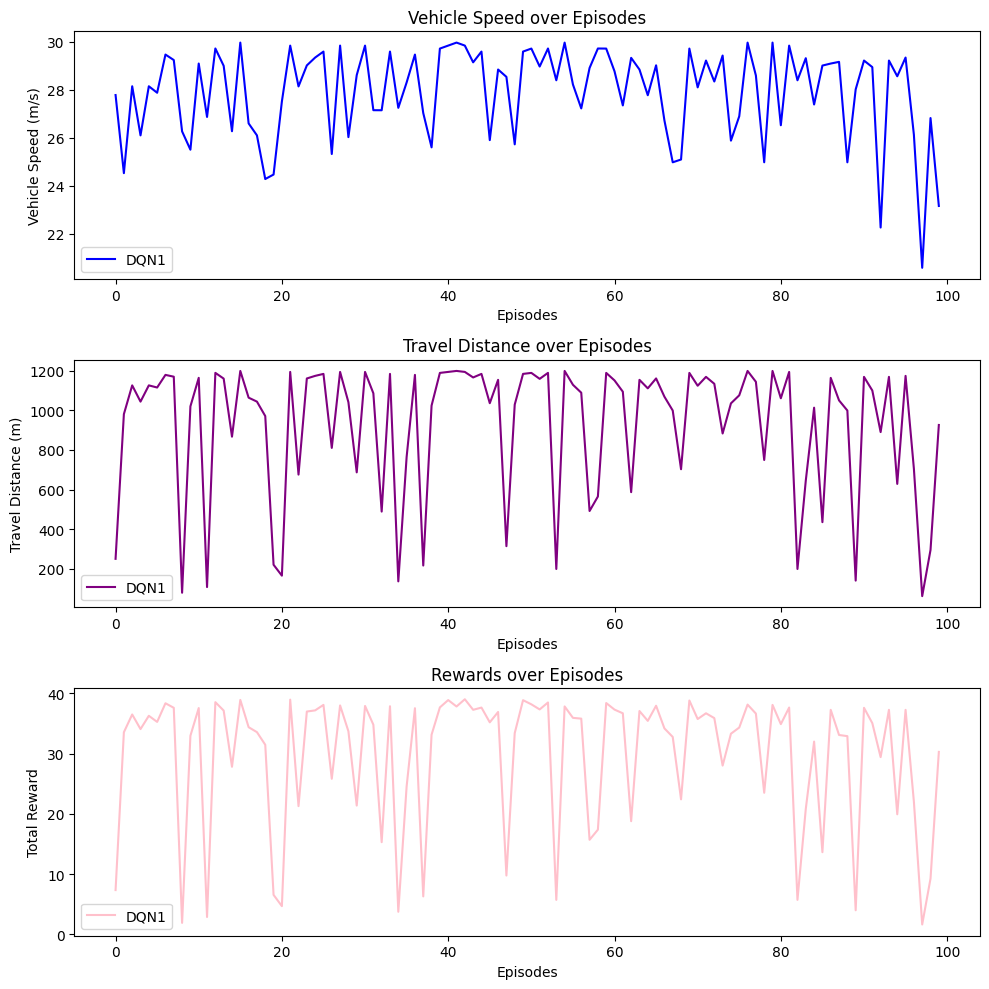

In [35]:
# Plotting vehicle speed
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(df1['episode'], df1['avg_speed'], label='DQN1', color='blue')
plt.xlabel('Episodes')
plt.ylabel('Vehicle Speed (m/s)')
plt.title('Vehicle Speed over Episodes')
plt.legend()

# Plotting travel distance
plt.subplot(3, 1, 2)
plt.plot(df1['episode'], df1['distance'], label='DQN1', color='purple')
plt.xlabel('Episodes')
plt.ylabel('Travel Distance (m)')
plt.title('Travel Distance over Episodes')
plt.legend()

# Plotting travel distance
plt.subplot(3, 1, 3)
plt.plot(df1['episode'], df1['total_reward'], label='DQN1', color='pink')
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.legend()

plt.tight_layout()
plt.show()

## Solution 2
Environment Observation Type: **Kinematics**\
Agent Action Type: **DiscreteMetaAction**\
Algorithm Used: **DQN**

In [ ]:
configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,

    "observation": {
        "type": "Kinematics",
        "features": ["presence", "x", "y", "vx", "vy", "heading", "long_off", "cos_d", "sin_d"],
        "vehicles_count": 10,
        "normalize": False,
        "clip": False,
        "see_behind": False,
        "order": "sorted",
        "absolute": False,
        "observe_intentions": True
    },

    "action": {
        "type": "DiscreteMetaAction",
    },

    "collision_reward": -2,
    "right_lane_reward": 0.1,
    "high_speed_reward": 0.15,
    "lane_change_reward": -0.05,
    "reward_speed_range": [25, 35],
    "normalize_reward": False,

    "simulation_frequency": 15,
    "policy_frequency": 1,

    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}


### Training our model

In [ ]:
env = gym.make('highway-v0', config=configuration)

model = DQN('MlpPolicy', env, policy_kwargs = dict(net_arch=[256, 256]),
            learning_rate = 1e-3, buffer_size = 15000, learning_starts = 500,
            batch_size = 64, gamma = 0.95, train_freq = 4, gradient_steps = 2,
            target_update_interval = 100, verbose = 1, tensorboard_log = 'highway_dqn/')
model.learn(10000)
model.save('highway_dqn/model')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | -0.579   |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4        |
|    time_elapsed     | 17       |
|    total_timesteps  | 71       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | -0.996   |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4        |
|    time_elapsed     | 29       |
|    total_timesteps  | 120      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
| 

In [ ]:
model.predict(env.reset()[0])[0]

array(2, dtype=int64)

### Simulation

In [ ]:
configuration_sim = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,

    "observation": {
        "type": "Kinematics",
        "features": ["presence", "x", "y", "vx", "vy", "heading", "long_off", "cos_d", "sin_d"],
        "vehicles_count": 10,
        "normalize": False,
        "clip": False,
        "see_behind": False,
        "order": "sorted",
        "absolute": False,
        "observe_intentions": True
    },

    "action": {
        "type": "DiscreteMetaAction",
    },

    "collision_reward": -1,
    "reward_speed_range": [20, 30],
    "simulation_frequency": 15,
    "policy_frequency": 1,

    "simulation_frequency": 15,
    "policy_frequency": 1,

    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}

In [ ]:
env = gym.make('highway-v0', config=configuration_sim, render_mode='human')
num_episodes = 100  
log_data = []
time_step = 1
for episode in range(num_episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    episode_speed = []
    episode_distance = 0  

    while not done:
        action, _states = model.predict(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        # Log the speed
        speed = info['speed']
        episode_speed.append(speed)

        episode_distance += speed * time_step

        if info['crashed']== True:
            collision_occurred = 1
        else: collision_occurred = 0

        obs = next_obs
        env.render()

    log_data.append({
        'episode': episode,
        'avg_speed': sum(episode_speed) / len(episode_speed),  
        'distance': episode_distance,  
        'total_reward': total_reward,
        'collision': int(collision_occurred)
    })

    print(f"Episode {episode + 1}: Total Reward: {round(total_reward, 2)}")

env.close()

# Save the log data
df2 = pd.DataFrame(log_data)

Episode 1: Total Reward: 29.63
Episode 2: Total Reward: 29.49
Episode 3: Total Reward: 17.2
Episode 4: Total Reward: 11.09
Episode 5: Total Reward: 29.14
Episode 6: Total Reward: 30.43
Episode 7: Total Reward: 29.42
Episode 8: Total Reward: 29.11
Episode 9: Total Reward: 5.36
Episode 10: Total Reward: 29.45
Episode 11: Total Reward: 5.21
Episode 12: Total Reward: 29.45
Episode 13: Total Reward: 29.49
Episode 14: Total Reward: 29.45
Episode 15: Total Reward: 29.76
Episode 16: Total Reward: 30.33
Episode 17: Total Reward: 29.36
Episode 18: Total Reward: 29.38
Episode 19: Total Reward: 29.45
Episode 20: Total Reward: 3.85
Episode 21: Total Reward: 7.45
Episode 22: Total Reward: 29.36
Episode 23: Total Reward: 29.65
Episode 24: Total Reward: 29.29
Episode 25: Total Reward: 29.4
Episode 26: Total Reward: 29.71
Episode 27: Total Reward: 29.85
Episode 28: Total Reward: 29.51
Episode 29: Total Reward: 29.27
Episode 30: Total Reward: 29.33
Episode 31: Total Reward: 29.16
Episode 32: Total Rewar

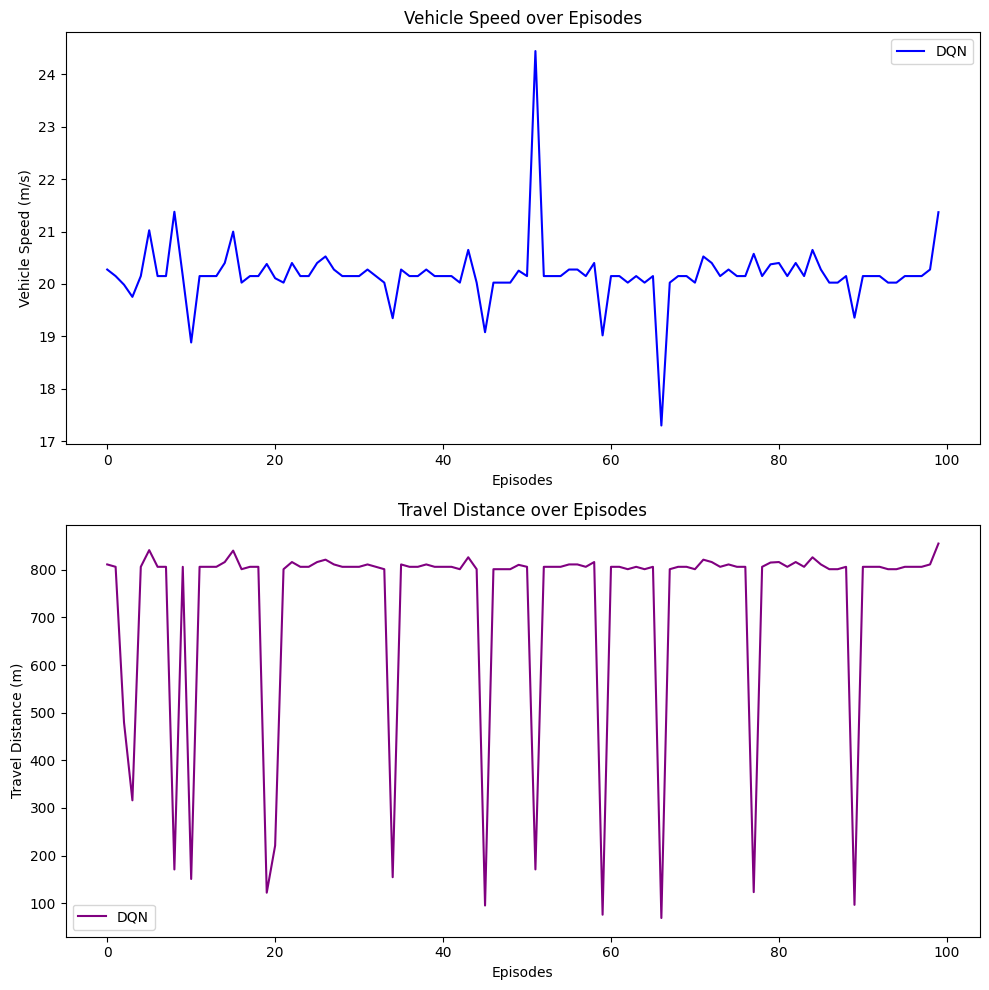

In [ ]:
# Plotting vehicle speed
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(df2['episode'], df2['avg_speed'], label='DQN', color='blue')
plt.xlabel('Episodes')
plt.ylabel('Vehicle Speed (m/s)')
plt.title('Vehicle Speed over Episodes')
plt.legend()

# Plotting travel distance
plt.subplot(2, 1, 2)
plt.plot(df2['episode'], df2['distance'], label='DQN', color='purple')
plt.xlabel('Episodes')
plt.ylabel('Travel Distance (m)')
plt.title('Travel Distance over Episodes')
plt.legend()

plt.tight_layout()
plt.show()

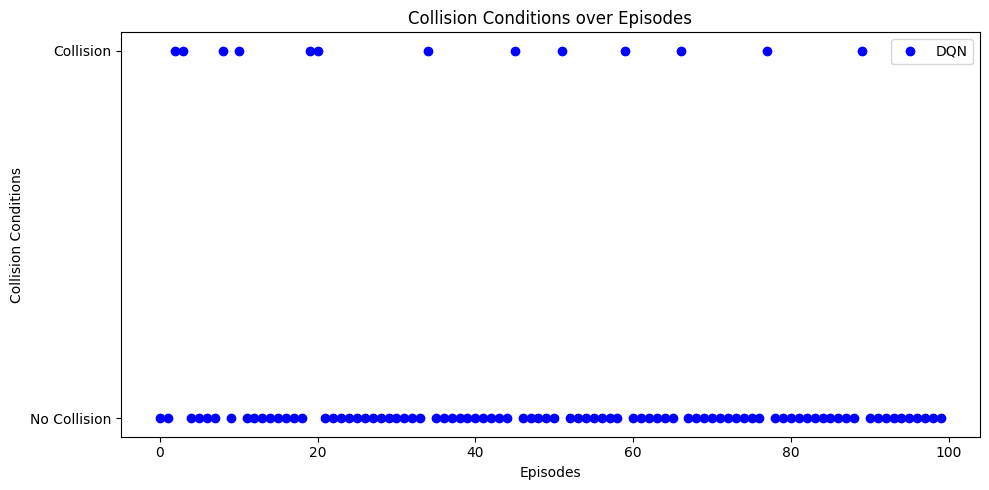

In [ ]:
# Plotting collision conditions
plt.figure(figsize=(10, 5))

plt.plot(df2['episode'], df2['collision'], label='DQN', color='blue', marker='o', linestyle='None')
plt.xlabel('Episodes')
plt.ylabel('Collision Conditions')
plt.title('Collision Conditions over Episodes')
plt.yticks([0, 1], ['No Collision', 'Collision'])
plt.legend()

plt.tight_layout()
plt.show()

## Solution 3
Environment Observation Type: **Kinematics**\
Agent Action Type: **DiscreteMetaActions**\
Algorithm Used: **SARSA**

In [ ]:
configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["presence", "x", "y", "vx"],
        "vehicles_count": 4,

    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "collision_reward": -20,
    "reward_speed_range": [10, 20], 
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False,
    "normalize_reward": False,
}

In [ ]:
env = gym.make('highway-v0', render_mode = 'human', config=configuration)

In [ ]:
env.observation_space

Box(-inf, inf, (4, 4), float32)

In [ ]:
state = env.reset()[0]

In [ ]:
state

array([[ 1.        ,  0.8787157 ,  0.5       ,  0.3125    ],
       [ 1.        ,  0.10457046,  0.        , -0.04609862],
       [ 1.        ,  0.19869599, -0.5       , -0.04383424],
       [ 1.        ,  0.31114188, -0.25      , -0.01824828]],
      dtype=float32)

In [ ]:
env.close()

We decided to use only position, x,y and vx for only 4 vehicles due to the size of the Q-table, where for this last three we use buckets of 4.

In [ ]:
def discretised_state(state, buckets=[1] + 3*[4] + [1] + 3*[4]+ [1] + 3*[4]+ [1] + 3*[4]):
    shape = state.shape
    state_f = state.flatten()
    state_f_n = (np.floor((((state_f - (-1)) /2 )) *  buckets
            ).astype(int))
    state_f_n[state_f_n == 4] = 3
    #state_n = state_f_n.reshape(shape)
    return tuple(state_f_n)

### Initialize our Q Table

In [ ]:
def initialize_Q_table(env):

    Q_table = np.zeros(shape=([2,4,4,4,2,4,4,4,2,4,4,4,2,4,4,4]+[env.action_space.n]), dtype=np.int8)


    return Q_table

In [ ]:
Q_table = initialize_Q_table(env)
print(discretised_state(state))
Q_table[discretised_state(state)]


(1, 3, 3, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1)


array([0, 0, 0, 0, 0], dtype=int8)

In [ ]:
env.action_space.n

5

In [ ]:
def epsilon_greedy_policy(env, state, Q_table, epsilon=.5):
    
    if np.random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state])

In [ ]:
epsilon_greedy_policy(env, discretised_state(state), Q_table, epsilon=.5)

0

### SARSA Control

In [ ]:
def SARSA_STEP(env, action, current_q_value, discrete_state, Q_table, alpha, gamma, epsilon):

    next_continuous_state, r, truncated, done, information = env.step(action)

    # Proximity penalty application
    # dictionary with a list of distances of nearby cars
    distances_to_cars = information.get('distances_to_cars', [])

    # only if there are distances
    if distances_to_cars:
        # distance to the closest car
        min_distance = min(distances_to_cars)
        safety_threshold = 10
        # if car is too close
        # The closer the car is the larger the penalty
        if min_distance < safety_threshold:
            proximity_penalty = 15 / max(min_distance, 0.1)
            r -= proximity_penalty

    print(information)

    Done = done | truncated

    if Done:
        return 0, 0, 0, r, Done

    # Calculate Next Discrete State
    next_discrete_state = discretised_state( next_continuous_state)
    
    # select the action a dash in the next state using the epsilon bgreedy policy:
    next_action = epsilon_greedy_policy(env, next_discrete_state, Q_table, epsilon=epsilon) 

    # compute the Q value of the next state-action pair
    next_q_value = Q_table[next_discrete_state][next_action]

    # Calculate the new Q value
    new_q_value = current_q_value + alpha*(r + gamma*next_q_value - current_q_value)

    # update the new Q value
    Q_table[discrete_state][action] = new_q_value
    
    # update next state to current state
    discrete_state = next_discrete_state
    
    # update next action to current action
    action = next_action
    
    # update the next q_value to current q value
    current_q_value = next_q_value

    return action, current_q_value, discrete_state, r, Done

In [ ]:
def TD_control(env, STEP_FUNCTION, num_iteractions=100, alpha=.85, gamma=.9):

    RETURN_LIST = []

    EPSILON = 1
    EPSILON_DECAY = EPSILON / num_iteractions
    
    Q_table = initialize_Q_table(env)

    # for each episode
    for i in tqdm(range(num_iteractions)):
        print("Eu sou o episodio ", i)
        
        # Initialize the state by resetting the environment and Discretize the state
        discrete_state = discretised_state(env.reset()[0])        
        print(discrete_state)
        # select the action using the epsilon-greedy policy
        action = epsilon_greedy_policy(env, discrete_state, Q_table, EPSILON)
        print(action)
        
        # select the current q_value
        current_q_value = Q_table[discrete_state][action]

        # Start Calculating each episode's return
        CUMULATIVE_REWARD = 0

        # Tracking when the episode is over
        Done = False

        # Tracking number of steps per episode
        STEP = 0

        #for each step in the episode:
        while not Done:
            
            # Run SARSA
            action, current_q_value, discrete_state, r, Done = STEP_FUNCTION(env, action, current_q_value, discrete_state, Q_table, alpha, gamma, EPSILON)

            # Store step-wise metrics
            CUMULATIVE_REWARD += r
            STEP += 1
            print(r)
            # if the current state is the terminal state then break:
            if Done:
                break
            
        # Store episode-wise metrics
        RETURN_LIST.append([i, STEP, CUMULATIVE_REWARD])

        # Update EPSILON to acccount for decay
        EPSILON -= EPSILON_DECAY


    # Metrics to benchmark learning process
    return_df = pd.DataFrame(RETURN_LIST, columns=['Episode', 'N_Steps', 'Return'])
                             
    return Q_table, return_df


In [ ]:
env.close()

In [ ]:
env = gym.make('highway-v0', config=configuration)
SARSA_Q_table, SARSA_return_df = TD_control(env, SARSA_STEP, num_iteractions=1500, alpha=.1, gamma=.9)
env.close()

  0%|          | 0/1500 [00:00<?, ?it/s]

Eu sou o episodio  0
(1, 3, 3, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1)
4
{'speed': 20.8544411731307, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 1.0, 'on_road_reward': 1.0}}
0.4666666666666667
{'speed': 20.146013943668194, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 1.0, 'on_road_reward': 1.0}}
0.4666666666666667
{'speed': 20.024952065064255, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 1.0, 'on_road_reward': 1.0}}
0.4666666666666667
{'speed': 24.14982284121841, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.6666666666666666, 'high_speed_reward': 1.0, 'on_road_reward': 1.0}}
0.4666666666666667
{'speed': 20.709155899347046, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, '

In [ ]:
SARSA_return_df

Episode  N_Steps     Return
0           0        7 -16.919142
1           1        4 -18.249199
2           2        6 -17.784919
3           3        8 -16.134348
4           4       15 -13.400000
...       ...      ...        ...
1495     1495        7 -17.200000
1496     1496        6 -17.963040
1497     1497       40  16.033333
1498     1498       10 -16.329707
1499     1499       19 -12.366667

[1500 rows x 3 columns]

In [ ]:
SARSA_return_df.to_csv(r'C:\Users\afspf\Documents\FAC\2nd semester\RL\Project\SARSA_return_df.csv', index=False)

<Axes: xlabel='Episode'>

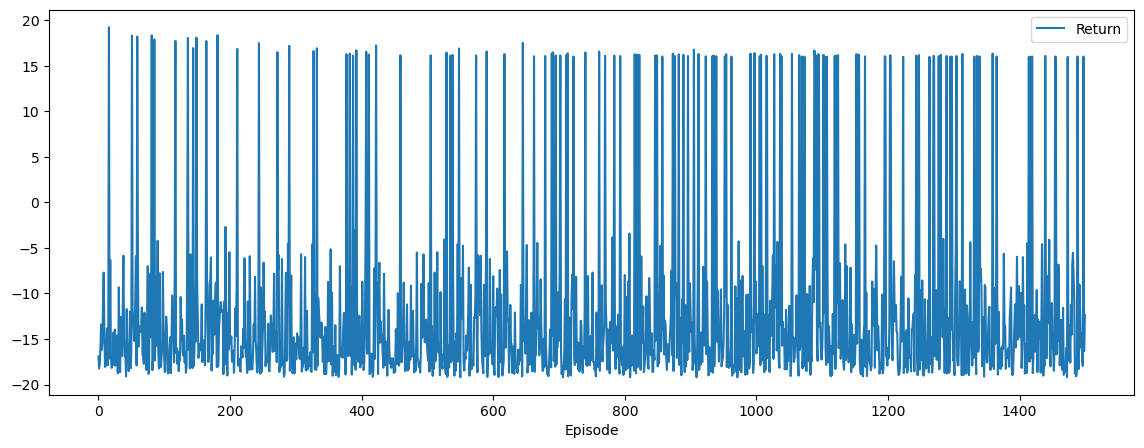

In [ ]:
SARSA_return_df.plot(x='Episode', y='Return', figsize=(14, 5))

### Simulation

In [ ]:
original_configuration = {
    "lanes_count": 4,
    "vehicles_count": 50,
    "duration": 40,
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",
    "initial_spacing": 2,
    "observation": {
        "type": "Kinematics",
        "features": ["presence", "x", "y", "vx"],
        "vehicles_count": 4,

    },
    "action": {
        "type": "DiscreteMetaAction",
    },
    "collision_reward": -1,
    "reward_speed_range": [20, 30], 
    "simulation_frequency": 15,
    "policy_frequency": 1,
    "screen_width": 800,
    "screen_height": 600,
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False,
}

In [ ]:
import matplotlib.pyplot as plt

def run_multiple_simulations(env, Q_table, num_runs):
    returns = []
    log_data = []
    time_step = 1
    for episode in range(num_runs):

        state = env.reset()[0]
        print(state)
        EPSILON = 0
        total_reward = 0
        episode_speed = []
        episode_distance = 0  
        collision_occurred = False

        CUMULATIVE_RETURN = 0

        discrete_state = discretised_state(state)

        done = False
        
        while not done:
            
            action = epsilon_greedy_policy(env, discrete_state, Q_table, epsilon=EPSILON) 

            continuous_state, r, truncated, done, info = env.step(action)

            total_reward += r

            speed = info['speed']
            episode_speed.append(speed)

            episode_distance += speed * time_step

            obs = continuous_state
            env.render()

            # Check if a collision occurred
            if info['crashed']== True:
                collision_occurred = 1
            else: collision_occurred = 0

        log_data.append({
                'episode': episode,
                'avg_speed': sum(episode_speed) / len(episode_speed),  
                'distance': episode_distance,  
                'total_reward': total_reward,
                'collision': int(collision_occurred)

        })

        print(f"Episode {episode + 1}: Total Reward: {round(total_reward,2)}")
        CUMULATIVE_RETURN += r

        
        returns.append(CUMULATIVE_RETURN)
        print(f"Run {episode+1}: Cumulative Return = {CUMULATIVE_RETURN}")
    env.close()
    df3 = pd.DataFrame(log_data)
    return returns, df3

env = gym.make('highway-v0', render_mode = "human", config=original_configuration)

num_runs = 100
cumulative_returns, df3 = run_multiple_simulations(env, SARSA_Q_table, num_runs)

[[ 1.          0.91829693  0.75        0.3125    ]
 [ 1.          0.09488577 -0.5        -0.03437912]
 [ 1.          0.19982918 -0.5        -0.03159435]
 [ 1.          0.29798335 -0.5        -0.04419773]]
Episode 1: Total Reward: 0.91
Run 1: Cumulative Return = 0.0
[[ 1.          0.88618857  0.25        0.3125    ]
 [ 1.          0.10483422 -0.25       -0.03868926]
 [ 1.          0.2014001  -0.25       -0.02802422]
 [ 1.          0.30394596  0.25       -0.04292026]]
Episode 2: Total Reward: 8.81
Run 2: Cumulative Return = 0.0
[[ 1.          0.8822953   0.          0.3125    ]
 [ 1.          0.11187025  0.5        -0.01803246]
 [ 1.          0.22153908  0.5        -0.03045117]
 [ 1.          0.33350345  0.25       -0.03848219]]
Episode 3: Total Reward: 12.0
Run 3: Cumulative Return = 0.0
[[ 1.          0.9187214   0.          0.3125    ]
 [ 1.          0.10249643  0.25       -0.02484052]
 [ 1.          0.21256524  0.         -0.01581118]
 [ 1.          0.31008187  0.5        -0.0314614 

In [ ]:
df3

episode  avg_speed     distance  total_reward  collision
0         0   1.469446    58.777841      0.909870          1
1         1   7.663150   306.525985      8.807192          1
2         2   9.770345   390.813807     12.000000          1
3         3   4.828840   193.153605      5.600000          1
4         4  25.000000  1000.000000     32.018961          0
..      ...        ...          ...           ...        ...
95       95   2.986257   119.450291      3.200000          1
96       96   3.913150   156.525985      4.008691          1
97       97  15.163150   606.525984     18.408691          1
98       98  12.868989   514.759553     16.000000          1
99       99   6.413150   256.525985      7.227653          1

[100 rows x 5 columns]

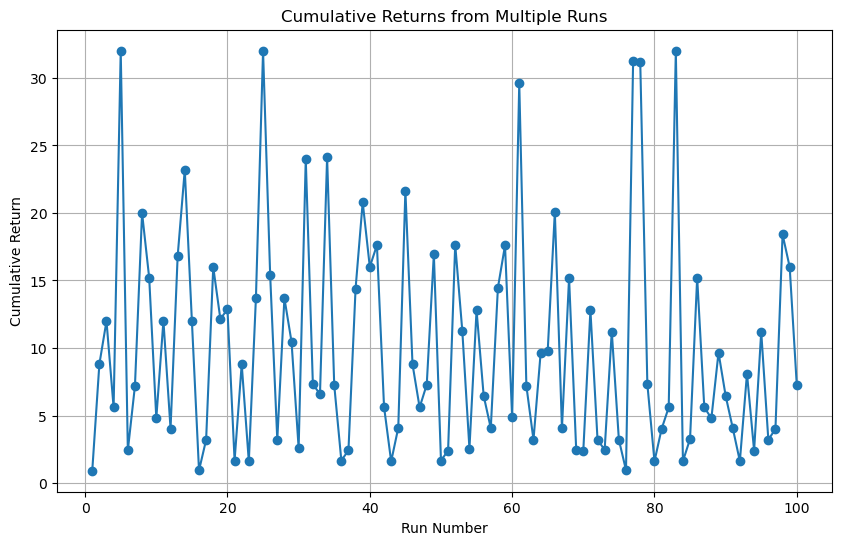

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_runs + 1), df3["total_reward"], marker='o', linestyle='-')
plt.title('Cumulative Returns from Multiple Runs')
plt.xlabel('Run Number')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

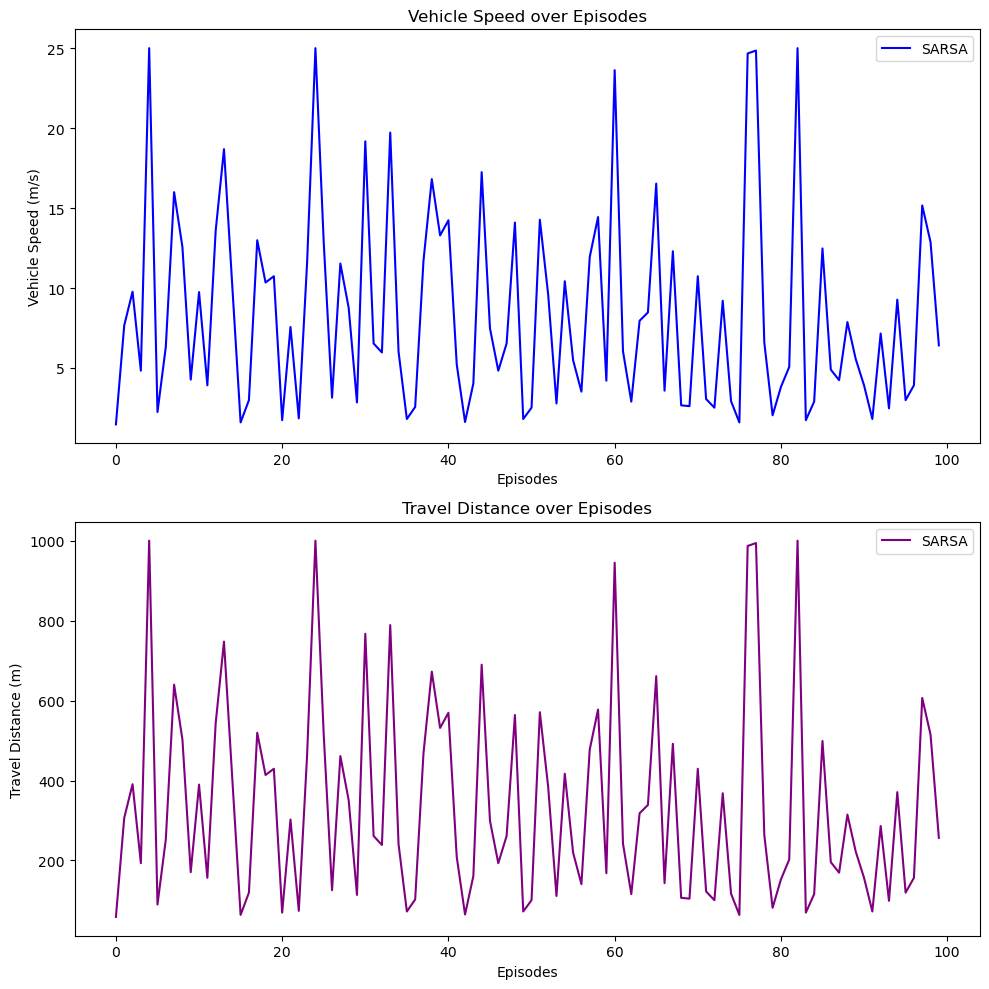

In [ ]:
# Plotting vehicle speed
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(df3['episode'], df3['avg_speed'], label='SARSA', color='blue')
plt.xlabel('Episodes')
plt.ylabel('Vehicle Speed (m/s)')
plt.title('Vehicle Speed over Episodes')
plt.legend()

# Plotting travel distance
plt.subplot(2, 1, 2)
plt.plot(df3['episode'], df3['distance'], label='SARSA', color='purple')
plt.xlabel('Episodes')
plt.ylabel('Travel Distance (m)')
plt.title('Travel Distance over Episodes')
plt.legend()

plt.tight_layout()
plt.show()

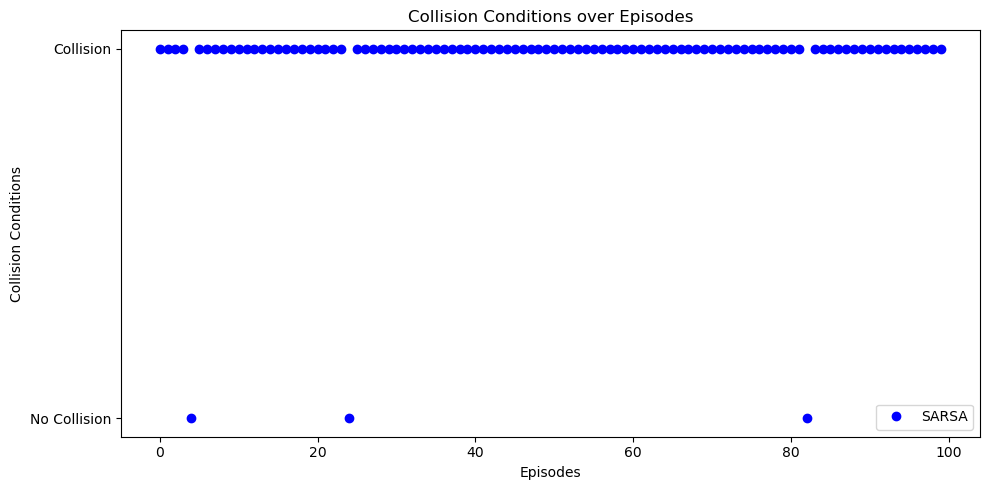

In [ ]:
# Plotting collision conditions
plt.figure(figsize=(10, 5))

plt.plot(df3['episode'], df3['collision'], label='SARSA', color='blue', marker='o', linestyle='None')
plt.xlabel('Episodes')
plt.ylabel('Collision Conditions')
plt.title('Collision Conditions over Episodes')
plt.yticks([0, 1], ['No Collision', 'Collision'])
plt.legend()

plt.tight_layout()
plt.show()

## Solution 4
Environment Observation Type: **Kinematics**\
Agent Action Type: **ContinuousActions**\
Algorithm Used: **SAC**

In [ ]:
config = {
    "lanes_count": 4,  # The environment must always have 10 lanes
    "vehicles_count": 50,  # The environment must always have 50 other vehicles
    "duration": 40,  # [s] The environment must terminate never before 120 seconds
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle",  # This is the policy of the other vehicles
    "initial_spacing": 2,  # Initial spacing between vehicles needs to be at most 2
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 10,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "absolute": False,
    },
    "action": {
        "type": "ContinuousAction",
        #"speed_range": [10,40],
        "acceleration_range": [0, 5], 
        #"steering_range": (-np.pi / 512, np.pi / 512), 
        "steering_range": [-0.002,0.002]
    },
    "collision_reward": -2,
    "reward_speed_range": [20, 30],  

    #"right_lane_reward": 2,
    #"high_speed_reward": 0,
    #"lane_change_reward": 0,
    #"normalize_reward": False,
    #"offroad_reward": -500,
    #'on_road_reward': 5,

    "simulation_frequency": 15, 
    "policy_frequency": 1, 
    "screen_width": 1200, 
    "screen_height": 800, 
    "centering_position": [0.5, 0.5],
    "scaling": 5,
    "show_trajectories": False,
    "render_agent": True,
    "offscreen_rendering": False
}


env = gym.make('highway-v0', render_mode='human')
env.configure(config)
env.reset()

/Users/Home_1/Documents/Programação bea/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.configure to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.configure` for environment variables or `env.get_wrapper_attr('configure')` that will search the reminding wrappers.
  logger.warn(


(array([[ 1.        ,  0.9126646 ,  0.25      ,  0.3125    ,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.09437448, -0.25      , -0.04590529,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.1999863 ,  0.25      , -0.0368142 ,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.29993805,  0.25      , -0.04668673,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.41021907,  0.        , -0.03094508,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.50483817,  0.5       , -0.04638242,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.61650544,  0.        , -0.03213816,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.71620274, -0.25      , -0.03227223,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.8278855 , -0.25      , -0.01690052,  0.        ,
          1.        ,  0.        ],
        [ 

In [ ]:
obs, info = env.reset()
pos = env.vehicle.velocity
print(pos)


[25.  0.]


/Users/Home_1/Documents/Programação bea/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.vehicle to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.vehicle` for environment variables or `env.get_wrapper_attr('vehicle')` that will search the reminding wrappers.
  logger.warn(


In [ ]:
def custom_reward(agent_pos, target_pos, env_reward, nearby_vehicles):
    
    #collision_penalty = -10 * sum(abs(vehicle[2]) < 2 for vehicle in nearby_vehicles)  -> Penalize if distance in y is less than 2
    # define reward for staying at least 2 units apart
    distance_reward = sum(max(0, 2 - abs(vehicle[2])) for vehicle in nearby_vehicles)  
    # y coordinates of lanes [0, 4, 8, 12], we use center as the second lane since we would perfer that the agent stays on the right most lane
    # we don't use the the right most lane here because this was used to help the agent stay on road
    # and giving the right most lane would make him leave the road on the right part so we provide a more central lane
    lane_center = 4 
    # reward to penalize for off-road
    onroad_reward = -abs(agent_pos[1] - lane_center) * 10  
    # reward to penalize for deviation from target position - end of the road
    distance_to_target_reward = -abs(agent_pos[1] - target_pos[1])  
    
    total_reward =   distance_reward + onroad_reward + distance_to_target_reward + env_reward
    
    return total_reward

A *CustomRewardWrapper* is a type of wrapper class in reinforcement learning, used to modify the reward function of an existing environment. In OpenAI Gym, wrappers are a powerful tool that allows us to add additional functionality to the env without altering the original env's code. 

In our wrapper we modify the reward method, to encourage the agent to: Stay on the road; Avoid collisions; Reach a target position efficiently. This is achieve with the custom_reward function defined above.

In [ ]:
class CustomRewardWrapper(gym.RewardWrapper):
    def __init__(self, env):
        super(CustomRewardWrapper, self).__init__(env)
        self.last_observation = None  
    
    def reward(self, reward):
        if self.last_observation is None:
            self.last_observation = self.env.reset()[0]
        
        # get the agent's position
        agent_pos = self.env.vehicle.position 
        
        # extract nearby vehicles information from the last observation
        nearby_vehicles = self.last_observation[:, 1:5] 
        
        #agent_velocity = self.env.vehicle.velocity
        # Target is the end of the lane
        target_pos = (agent_pos[0] + 100, 2) 
        
        env_reward = reward
        
        # calculate custom reward
        custom_reward_value = custom_reward(agent_pos, target_pos, env_reward, nearby_vehicles)
        
        total_reward = custom_reward_value
        
        return total_reward



In [ ]:
from stable_baselines3 import DDPG, SAC
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.evaluation import evaluate_policy

# first we apply the Wrapper on the env and then we define the model and train it
env = CustomRewardWrapper(env)

model = SAC('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=5000)


mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")


model.save("SAC_highway_5000")

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/var/folders/2t/w9vyr37n5bj4tdy014cccg540000gn/T/ipykernel_12268/3142878390.py:8: SyntaxWarning: invalid escape sequence '\.'
  warnings.filterwarnings("ignore", message=".*env\.vehicle to get variables from other wrappers is deprecated.*")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/Home_1/Documents/Programação bea/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 8        |
|    ep_rew_mean     | 42       |
| time/              |          |
|    episodes        | 4        |
|    fps             | 3        |
|    time_elapsed    | 8        |
|    total_timesteps | 32       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7        |
|    ep_rew_mean     | -24.1    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 3        |
|    time_elapsed    | 14       |
|    total_timesteps | 56       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.5      |
|    ep_rew_mean     | -83      |
| time/              |          |
|    episodes        | 12       |
|    fps             | 3        |
|    time_elapsed    | 22       |
|    total_timesteps | 90       |
--------------

/Users/Home_1/Documents/Programação bea/.venv/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean Reward: -113.22995816767215, Std Reward: 104.22706572935525


In [ ]:
env = CustomRewardWrapper(env)
model = SAC(
    policy='MlpPolicy',
    env=env,
    verbose=1,
    buffer_size=1000000,
    learning_rate=1e-3,
    batch_size=256,
    gamma=0.95,
    policy_kwargs=dict(net_arch=[256, 256, 256])
)
model.learn(total_timesteps=5000)

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean Reward: {mean_reward}, Std Reward: {std_reward}")

model.save("SAC_highway_params")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/2t/w9vyr37n5bj4tdy014cccg540000gn/T/ipykernel_12268/1719884749.py:3: SyntaxWarning: invalid escape sequence '\.'
  warnings.filterwarnings("ignore", message=".*env\.vehicle to get variables from other wrappers is deprecated.*")


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.25     |
|    ep_rew_mean     | -113     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 4        |
|    time_elapsed    | 4        |
|    total_timesteps | 21       |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 7.62     |
|    ep_rew_mean     | -275     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 5        |
|    time_elapsed    | 12       |
|    total_timesteps | 61       |
---------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 10.1      |
|    ep_rew_mean     | -1.42e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 4         |
|    time_elapsed    | 24        |
|    total_timesteps | 121       |
| tra

/Users/Home_1/Documents/Programação bea/.venv/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean Reward: -35.43382673561573, Std Reward: 62.70100550118753


In [ ]:
env = gym.make('highway-v0', config=config, render_mode = 'human')
num_episodes = 10

for episode in range(num_episodes):
    obs, info = env.reset()  
    done = False
    total_reward = 0
    
    while not done:
        action, _states = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        env.render()

    print(f"Episode {episode + 1}: Total Reward: {round(total_reward,2)}")

env.close()

Episode 1: Total Reward: 4.13
Episode 2: Total Reward: 5.89
Episode 3: Total Reward: 1.91
Episode 4: Total Reward: 5.02
Episode 5: Total Reward: 3.93
Episode 6: Total Reward: 1.17
Episode 7: Total Reward: 6.02
Episode 8: Total Reward: 3.01
Episode 9: Total Reward: 5.96
Episode 10: Total Reward: 3.07


In [ ]:
loaded_model = SAC.load("SAC_highway_params")

In [ ]:
env = gym.make('highway-v0', config=config, render_mode='human')
num_episodes = 100
log_data = []

time_step = 1

for episode in range(num_episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0
    episode_speed = []
    episode_distance = 0 
    collision_occurred = False

    while not done:
        action, _states = model.predict(obs)
        next_obs, reward, done, truncated, info = env.step(action)
        total_reward += reward

        speed = info['speed']
        episode_speed.append(speed)

        episode_distance += speed * time_step

        if info['crashed']== True:
            collision_occurred = 1
        else: collision_occurred = 0

        obs = next_obs
        env.render()

    log_data.append({
        'episode': episode,
        'avg_speed': sum(episode_speed) / len(episode_speed),  
        'distance': episode_distance,  
        'total_reward': total_reward,
        'collision': int(collision_occurred)  
    })

    print(f"Episode {episode + 1}: Total Reward: {round(total_reward, 2)}")

env.close()

df4 = pd.DataFrame(log_data)

Episode 1: Total Reward: 1.88
Episode 2: Total Reward: 4.87
Episode 3: Total Reward: 4.17
Episode 4: Total Reward: 1.98
Episode 5: Total Reward: 3.81
Episode 6: Total Reward: 4.87
Episode 7: Total Reward: 1.89
Episode 8: Total Reward: 1.95
Episode 9: Total Reward: 2.95
Episode 10: Total Reward: 1.98
Episode 11: Total Reward: 3.87
Episode 12: Total Reward: 5.14
Episode 13: Total Reward: 4.98
Episode 14: Total Reward: 12.8
Episode 15: Total Reward: 5.1
Episode 16: Total Reward: 1.09
Episode 17: Total Reward: 6.98
Episode 18: Total Reward: 6.87
Episode 19: Total Reward: 4.9
Episode 20: Total Reward: 4.02
Episode 21: Total Reward: 5.82
Episode 22: Total Reward: 2.04
Episode 23: Total Reward: 5.96
Episode 24: Total Reward: 2.96
Episode 25: Total Reward: 1.89
Episode 26: Total Reward: 2.02
Episode 27: Total Reward: 1.98
Episode 28: Total Reward: 3.88
Episode 29: Total Reward: 5.88
Episode 30: Total Reward: 11.71
Episode 31: Total Reward: 3.13
Episode 32: Total Reward: 3.94
Episode 33: Total 

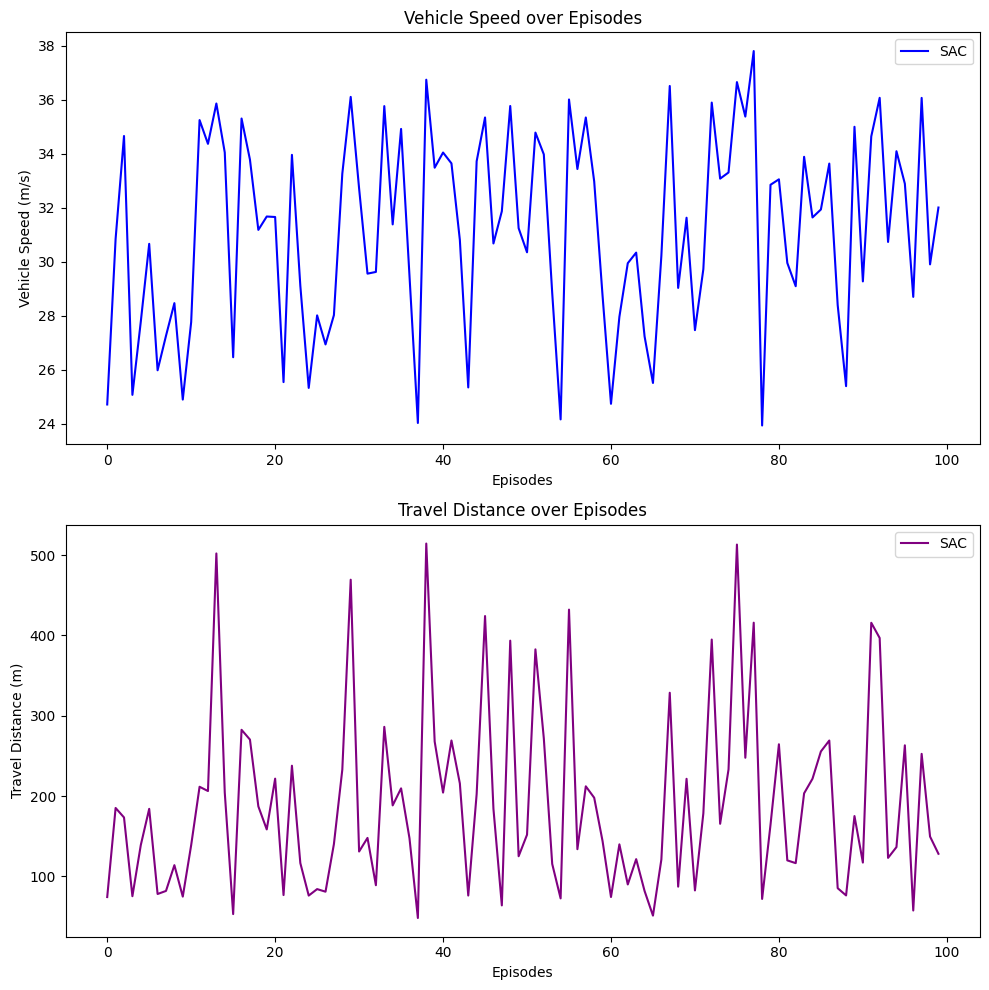

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(df4['episode'], df4['avg_speed'], label='SAC', color='blue')
plt.xlabel('Episodes')
plt.ylabel('Vehicle Speed (m/s)')
plt.title('Vehicle Speed over Episodes')
plt.legend()

# Plotting travel distance
plt.subplot(2, 1, 2)
plt.plot(df4['episode'], df4['distance'], label='SAC', color='purple')
plt.xlabel('Episodes')
plt.ylabel('Travel Distance (m)')
plt.title('Travel Distance over Episodes')
plt.legend()

plt.tight_layout()
plt.show()


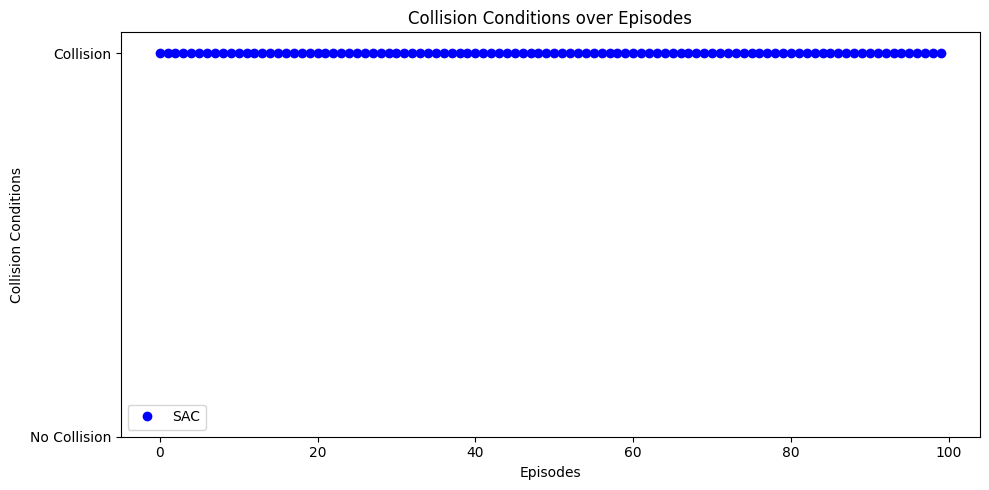

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(df4['episode'], df4['collision'], label='SAC', color='blue', marker='o', linestyle='None')
plt.xlabel('Episodes')
plt.ylabel('Collision Conditions')
plt.title('Collision Conditions over Episodes')
plt.yticks([0, 1], ['No Collision', 'Collision'])
plt.legend()

plt.tight_layout()
plt.show()


# Comparisons

In [36]:
#codigo da Bea:
df4 = pd.read_csv(r'C:\Users\adria\Documents\RL\csv_bea.csv')
df3 = pd.read_csv(r'C:\Users\adria\Documents\RL\csv_ana.csv')
df2 = pd.read_csv(r'C:\Users\adria\Documents\RL\csv_pedro.csv')

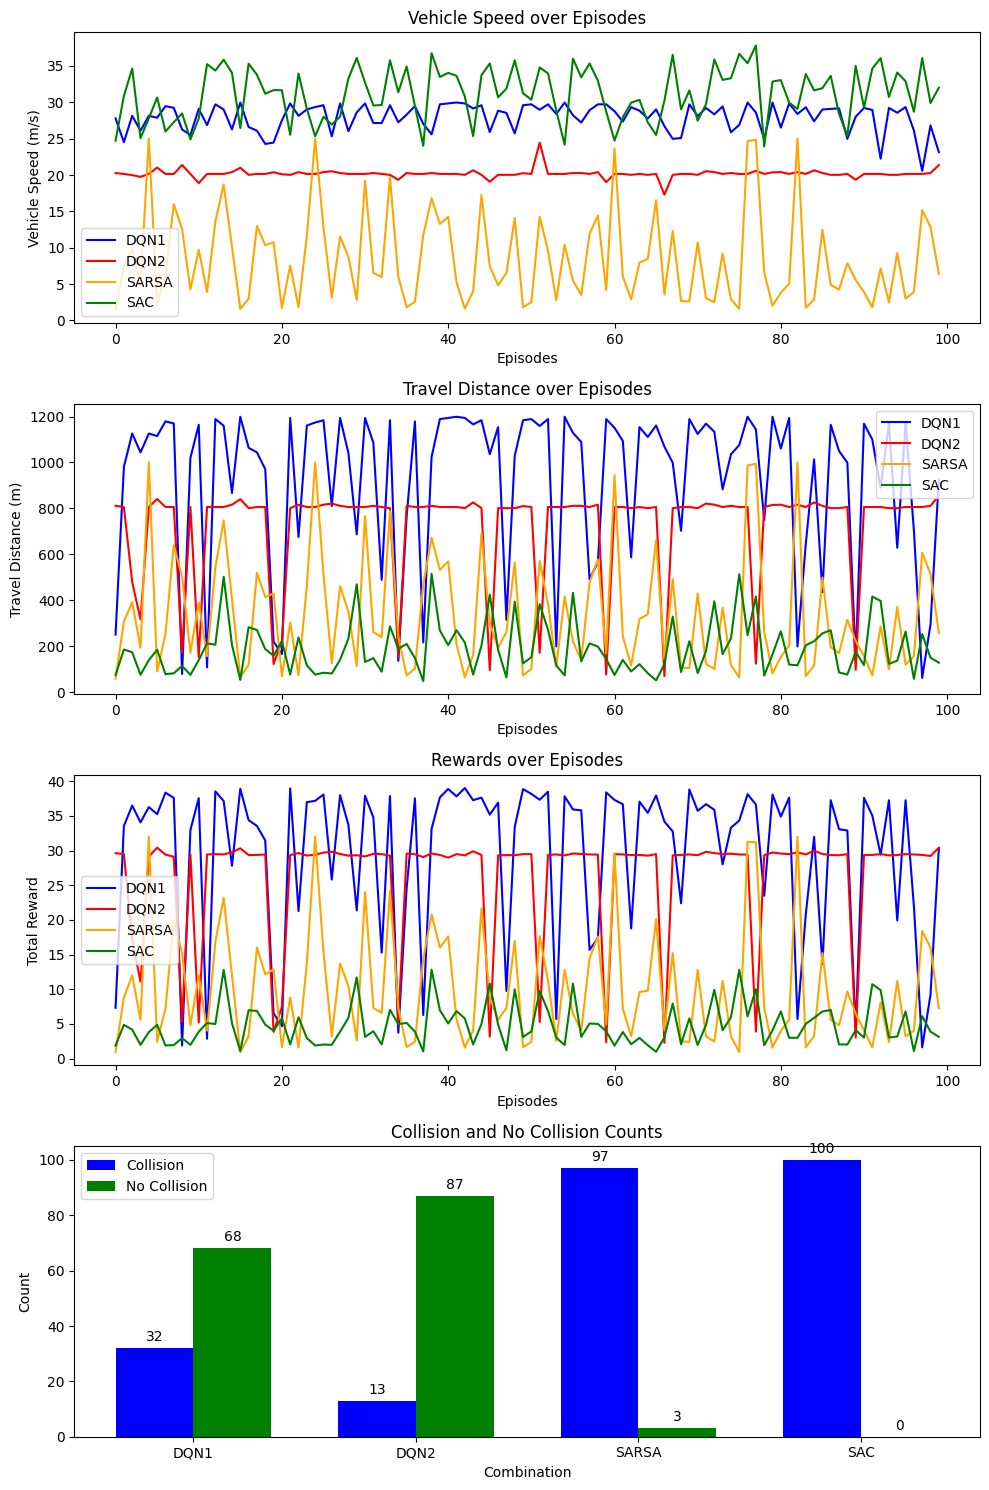

In [49]:
plt.figure(figsize=(10, 15))

dfs = [df1, df2, df3, df4]
labels = ['DQN1', 'DQN2', 'SARSA', 'SAC']
colors = ['blue', 'red', 'orange', 'green']

plt.subplot(4, 1, 1)
for df, label, color in zip(dfs, labels, colors):
    plt.plot(df1['episode'], df['avg_speed'], label=label, color=color)
plt.xlabel('Episodes')
plt.ylabel('Vehicle Speed (m/s)')
plt.title('Vehicle Speed over Episodes')
plt.legend()

plt.subplot(4, 1, 2)
for df, label, color in zip(dfs, labels, colors):
    plt.plot(df1['episode'], df['distance'], label=label, color=color)
plt.xlabel('Episodes')
plt.ylabel('Travel Distance (m)')
plt.title('Travel Distance over Episodes')
plt.legend()


plt.subplot(4, 1, 3)
for df, label, color in zip(dfs, labels, colors):
    plt.plot(df1['episode'], df['total_reward'], label=label, color=color)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Rewards over Episodes')
plt.legend()

plt.subplot(4, 1, 4)
collision_counts = [df['collision'].sum() for df in dfs]
no_collision_counts = [(df['collision'] == 0).sum() for df in dfs]
x = np.arange(len(labels))  
width = 0.35 
rects1 = plt.bar(x - width/2, collision_counts, width, label='Collision', color='blue')
rects2 = plt.bar(x + width/2, no_collision_counts, width, label='No Collision', color='green')
plt.xlabel('Combination')
plt.ylabel('Count')
plt.title('Collision and No Collision Counts')
plt.xticks(x, labels)
plt.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3), 
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()

plt.show()